In [2]:
import random
import sys

import numpy as np
import torch

In [221]:
# block for configuring random seed

random_seed = 50501
if random_seed is None:
    random_seed = random.randrange(2**16)
    print("No initial random seed given, generated one:", random_seed)

random.seed(random_seed)
np.random.seed(random_seed)
torch.manual_seed(random_seed)

print(random.randint(1, 100))
print(np.random.randint(1, 100))
print(torch.randint(1, 100, (1,)))

91
99
tensor([35])


In [17]:
torch.cat((torch.arange(0.1,4.1,0.1),torch.arange(4.2,9.2,0.4)))

tensor([0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000, 0.9000,
        1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000, 1.7000, 1.8000,
        1.9000, 2.0000, 2.1000, 2.2000, 2.3000, 2.4000, 2.5000, 2.6000, 2.7000,
        2.8000, 2.9000, 3.0000, 3.1000, 3.2000, 3.3000, 3.4000, 3.5000, 3.6000,
        3.7000, 3.8000, 3.9000, 4.0000, 4.2000, 4.6000, 5.0000, 5.4000, 5.8000,
        6.2000, 6.6000, 7.0000, 7.4000, 7.8000, 8.2000, 8.6000, 9.0000])

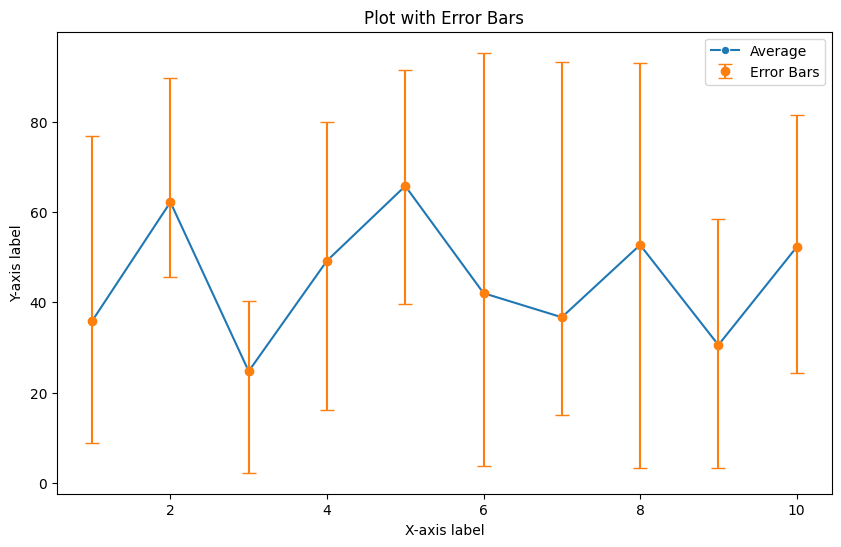

In [1]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample two-dimensional tensor
torch.manual_seed(0)
data = torch.rand(10, 5) * 100  # 10 data points, each with 5 values

# Calculate statistics
min_vals = data.min(dim=1).values.numpy()
max_vals = data.max(dim=1).values.numpy()
avg_vals = data.mean(dim=1).numpy()

# Calculate error bars
yerr_lower = avg_vals - min_vals
yerr_upper = max_vals - avg_vals

# Prepare data for plotting
df = pd.DataFrame({
    'x': range(1, len(avg_vals) + 1),
    'avg': avg_vals,
    'yerr_lower': yerr_lower,
    'yerr_upper': yerr_upper
})

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=df, x='x', y='avg', marker='o', label='Average')

# Adding error bars
ax.errorbar(df['x'], df['avg'], yerr=[df['yerr_lower'], df['yerr_upper']], fmt='o', capsize=5, label='Error Bars')

# Adding labels and title
ax.set_xlabel('X-axis label')
ax.set_ylabel('Y-axis label')
ax.set_title('Plot with Error Bars')
ax.legend()

# Show plot
plt.show()


In [ ]:
def plot_error_bars(oversamplings,data,title='Performance'):
    
    # Calculate statistics
    min_vals = data.min(dim=1).numpy()
    max_vals = data.max(dim=1).numpy()
    avg_vals = data.mean(dim=1).numpy()

    # Calculate error bars
    yerr_lower = avg_vals - min_vals
    yerr_upper = max_vals - avg_vals

    # Prepare data for plotting
    df = pd.DataFrame({
        'x': oversamplings,
        'avg': avg_vals,
        'yerr_lower': yerr_lower,
        'yerr_upper': yerr_upper
    })

    # Plotting
    plt.figure(figsize=(10, 6))
    ax = sns.lineplot(data=df, x='x', y='avg', marker='o', label='Average')

    # Adding error bars
    ax.errorbar(df['x'], df['avg'], yerr=[df['yerr_lower'], df['yerr_upper']], fmt='o', capsize=5, label='Error Bars')

    # Adding labels and title
    ax.set_xlabel('Oversampling Ratio')
    ax.set_ylabel('Consine Similarity')
    ax.set_title(title)
    ax.legend()

    # Show plot
    plt.show()